# A full working example 

This example concerns the **study of coked hierarchical zeolites**.

In [1]:
from spectrochempy.api import *
options.log_level=WARN


        SpectroChemPy's API
        Version   : 0.1a3.post11
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


## Introduction

todo : complete this 

Below we use the matplotlib library to draw the figure of the AGIR setup.

<IPython.core.display.Javascript object>


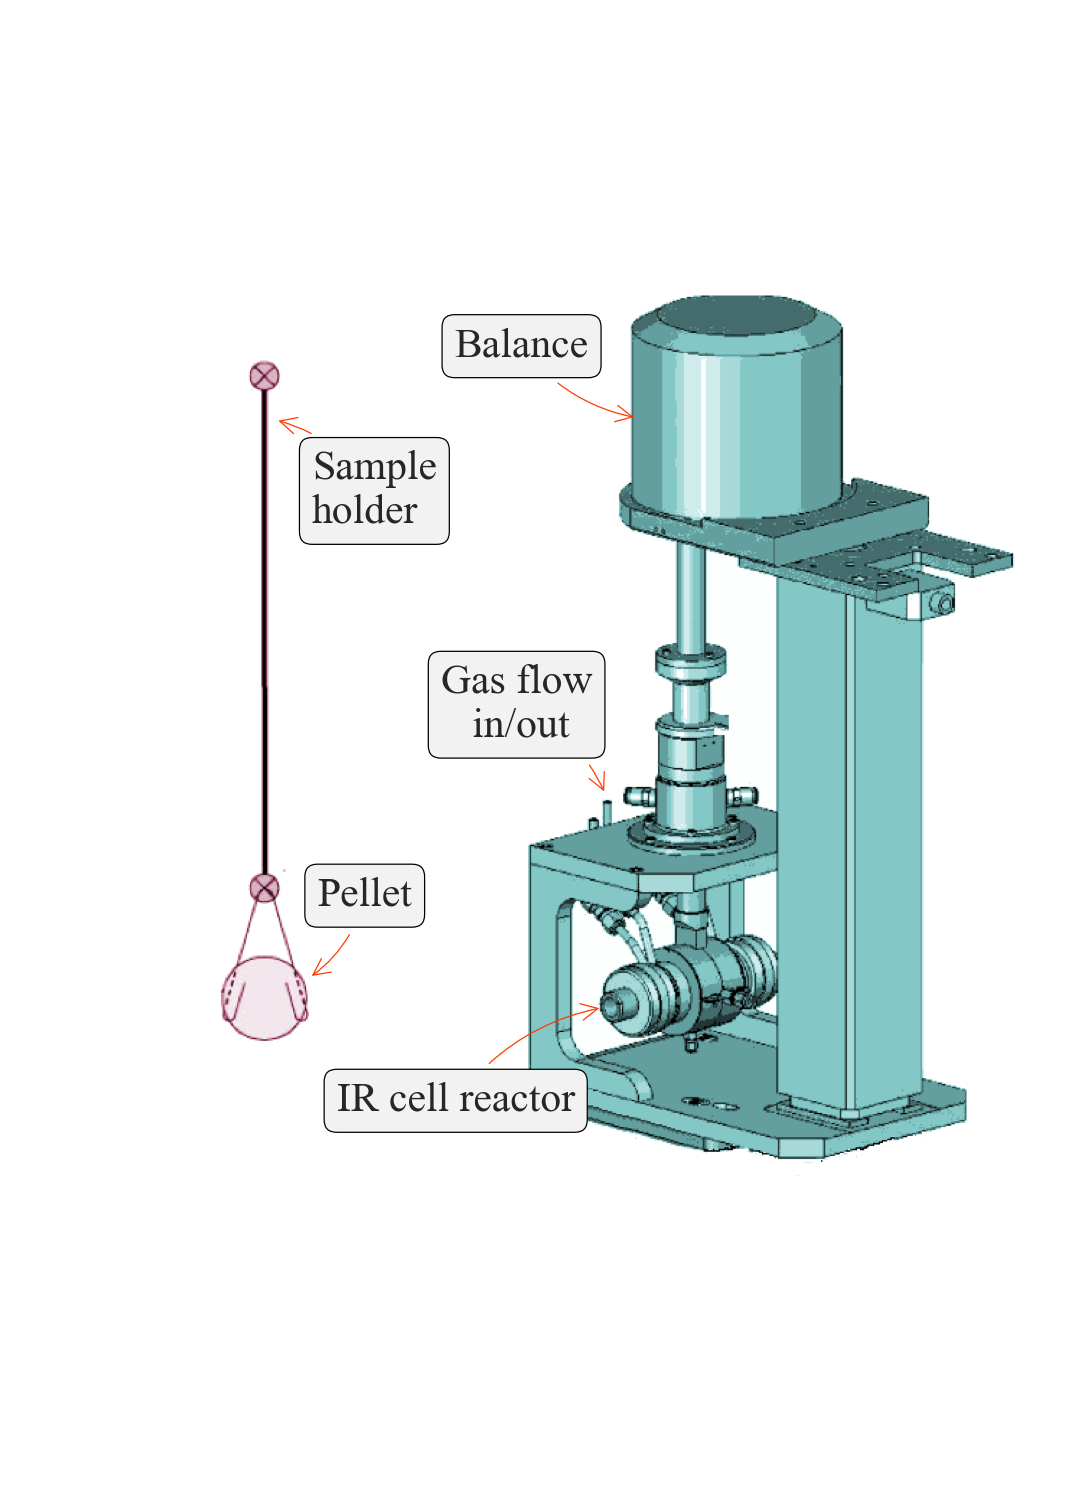

In [2]:
fig = plt.figure(figsize=(3.6,5), dpi=150, frameon=False)
ax = fig.add_subplot(111)
agir = plt.imread('agir_setup.png')
ax.imshow(agir)
ax.axis('off')
    
fs = 10

ax.annotate('Balance', xy=(3200, 1000),  xycoords='data',fontsize=fs,
                xytext=(-45, 15), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=NRed,
                                connectionstyle="arc3,rad=.2"),
                bbox=dict(boxstyle="round", fc="0.95"),
                )
ax.annotate('IR cell reactor', xy=(3000, 4400),  xycoords='data',fontsize=fs,
                xytext=(-65, -25), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=NRed,
                                connectionstyle="arc3,rad=-.2"),
                bbox=dict(boxstyle="round", fc="0.95"),
                )

ax.annotate('Gas flow\n   in/out', xy=(3000, 3200),  xycoords='data',fontsize=fs,
                xytext=(-40, 15), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=NRed,
                                connectionstyle="arc3,rad=-.2"),
                bbox=dict(boxstyle="round", fc="0.95"),
                )

ax.annotate('Sample\nholder', xy=(1050, 1000),  xycoords='data',fontsize=fs,
                xytext=(10, -25), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=NRed,
                                connectionstyle="arc3,rad=.2"),
                bbox=dict(boxstyle="round", fc="0.95"),
                )

ax.annotate('Pellet', xy=(1250, 4250),  xycoords='data', fontsize=fs,
                xytext=(3, 18), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", color=NRed,
                                connectionstyle="arc3,rad=-.2"),
                bbox=dict(boxstyle="round", fc="0.95"),
                )

plt.subplots_adjust(top=1., bottom=0.0, left=0.0, right=1.0)#, wspace=0.5)
ax.set_xlim(500,5400)
extension = '.png'
fig.savefig('annotated_fig_agir_setup%s'%extension, dpi=600)
plt.show()

## Reading the data

The data, we will be processing come from the AGIR setup at the Laboratory LCS.

We have TGA (Thermogravimetric analysis) and IR (Infrared) data recorded simultaneously, for 3 samples recorded at 350°C :
P (parent), A (acid treatment), B (basic treatment)

The IR data have been exported as `csv` file (on file per spectra) and then zipped. Therefore, we will use the function `read_zip` to open the IR data. 

For the TGA data are in `csv` files, so we use `read_csv` to read them.

To keep the data easily accessible, we create a dictionary `samples`

In [3]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

##### Reading IR data

Note that reading a large set of `.csv` file is rather slow. Be patient! 

After reading each dataset, we save the data in the `scp` format of SpectroChemPy, so that further reading of the data will be much faster.

In [4]:
for key, sample in samples.items():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    if os.path.exists(basename+'.scp'):
        #check if the scp file have already been saved
        filename = basename + '.scp'
        sample['IR'] = NDDataset.read( filename)
    else:
        # else read the original zip file
        filename = basename + '.zip'
        sample['IR'] = NDDataset.read_zip( filename, origin='omnic_export')
    # save
    sample['IR'].save(basename + '.scp')

##### Plot of the raw IR data 

<IPython.core.display.Javascript object>


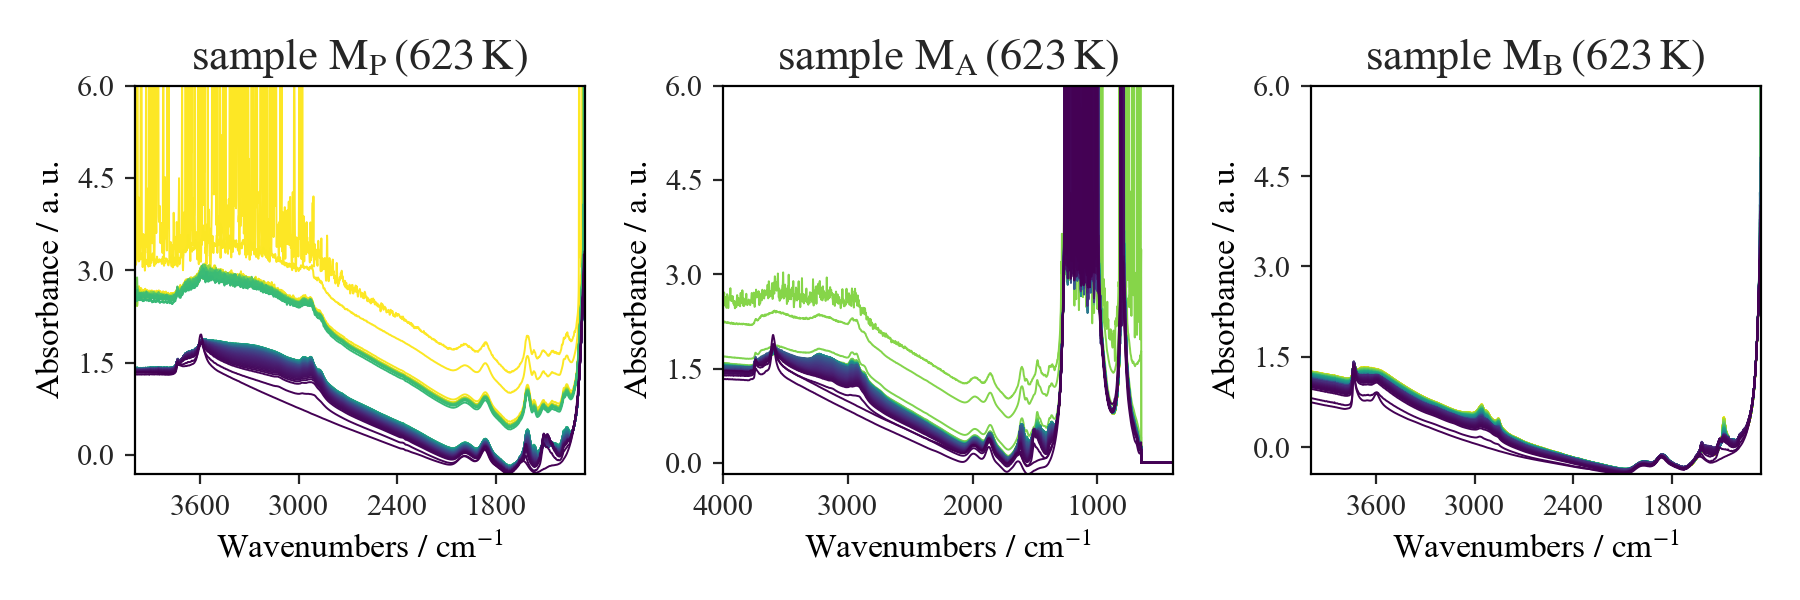

In [5]:
axes = subplots(nrow=1, ncol=3, figsize=(9,3))

for ax, sample in zip(axes.values(), samples.values()):
    s = sample['IR']
    s.plot_stack(ax=ax, colorbar=False, hold=True)   
            # hold is necessary to say that we will plot on the same figure (even if it is different axes) 
    label = sample['label']
    title = 'sample {}'.format(label)
    ax.set_title(title, fontsize=16)

##### Reading TGA data

Now read the TGA data

In [6]:
for key, sample in samples.items():
    basename = os.path.join(scpdata,'agirdata/{}/TGA/tg'.format(key))
    if os.path.exists(basename+'.scp'):
        #check if the scp file have already been saved
        filename = basename + '.scp'
        sample['TGA'] = NDDataset.read( filename)
    else:
        # else read the original csv file
        filename = basename + '.csv'
        ss = sample['TGA'] = NDDataset.read_csv(filename)
        # lets keep only data from something close to 0.
        s = sample['TGA'] = ss[-0.5:35.0]
        # for TGA, some information are missing. 
        # we add them here
        s.x.units = 'hour'
        s.units = 'weight_percent' 
        s.x.title = 'Time-on-stream'
        s.title = 'Mass change'
    # save
    sample['TGA'].save(basename + '.scp')

##### Plot of the TGA data

<IPython.core.display.Javascript object>


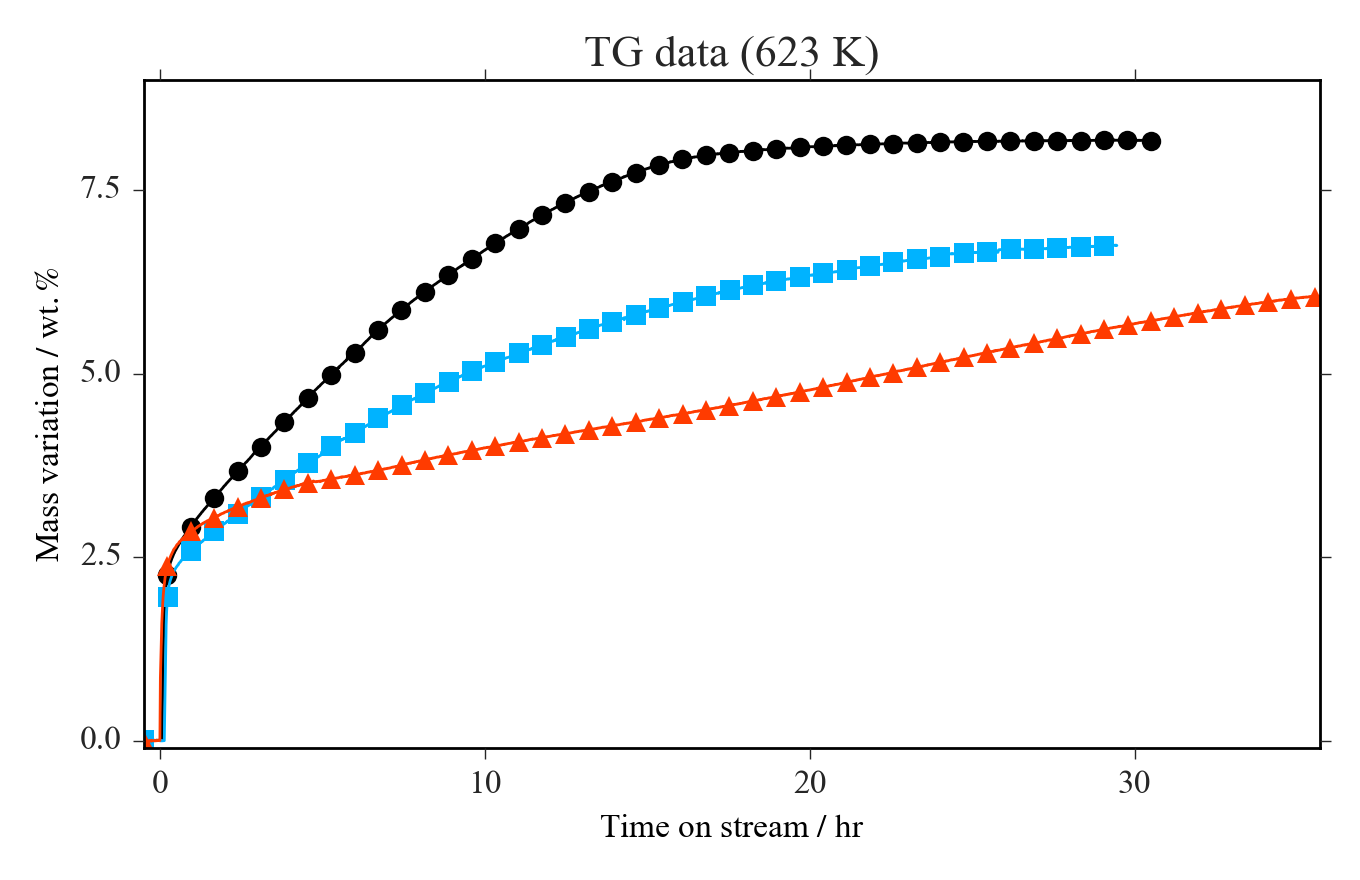

In [8]:
figure()
# we will make a scatter plot on the same figure
colors = [NBlack, NBlue, NRed]
markers = ['o','s','^']
for sample, color, marker in zip(samples.values(), colors, markers):
    s = sample['TGA']
    s.plot_scatter(ylim=(-.1,9), lines=True, m=marker, c=color, ms=7, me=50, hold=True)   
            # hold is necessary to say that we will plot on the same figure
label = sample['label']
title = 'TG data (623 K)'
s.ax.set_title(title, fontsize=16)
show()